In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Loading Datasets

In [118]:
df_mocap = pd.read_csv("data/Postures.csv").sample(10000, random_state=27)
df_mocap.replace("?", 0, inplace=True)


X_mocap = StandardScaler().fit_transform(df_mocap.drop(['Class','User'], axis=1))
y_mocap = df_mocap["Class"]

# X_train_pos, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1101)

In [120]:
df_pd = pd.read_csv("data/pd_speech_features.csv")

X_pd = StandardScaler().fit_transform(df_pd.drop(['class','id'], axis=1))
y_pd = df_pd["class"]

In [121]:
#reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
def get_kmeans_elbow(X, title):
    clusters = [x for x in range(2,10)]
    sil_scores = {}
    for cluster in tqdm(clusters):
        clusterer = KMeans(n_clusters=cluster, random_state=27)
        cluster_labels = clusterer.fit_predict(X)
        sil_score = silhouette_score(X, cluster_labels)
        sil_scores[cluster] = sil_score
    plt.plot(sil_scores.keys(), sil_scores.values())
    plt.xlabel("No. of clusters")
    plt.ylabel("Silhoutte Coefficient")
    plt.title(title)
    plt.show()


  0%|          | 0/8 [00:00<?, ?it/s]

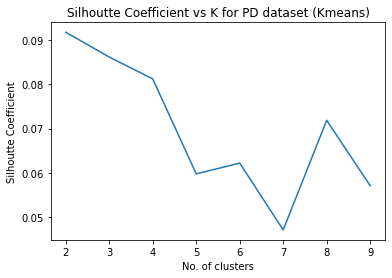

In [122]:
get_kmeans_elbow(X_pd, "Silhoutte Coefficient vs K for PD dataset (Kmeans)")

  0%|          | 0/8 [00:00<?, ?it/s]

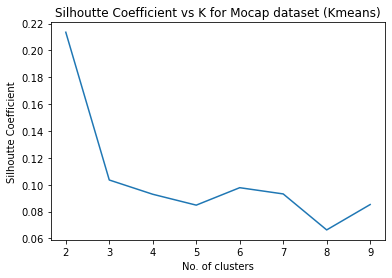

In [123]:
get_kmeans_elbow(X_mocap, "Silhoutte Coefficient vs K for Mocap dataset (Kmeans)")

In [124]:
def get_gmm_elbow(X, title):
    clusters = [x for x in range(2,10)]
    sil_scores = {}
    for cluster in tqdm(clusters):
        clusterer = GaussianMixture(n_components=cluster, random_state=27, reg_covar=1e-4)
        cluster_labels = clusterer.fit_predict(X)
        sil_score = silhouette_score(X, cluster_labels)
        sil_scores[cluster] = sil_score
    plt.plot(sil_scores.keys(), sil_scores.values())
    plt.xlabel("No. of clusters")
    plt.ylabel("Silhoutte Coefficient")
    plt.title(title)
    plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

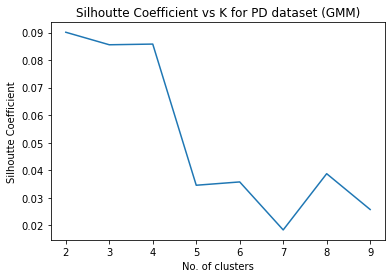

In [127]:
get_gmm_elbow(X_pd, "Silhoutte Coefficient vs K for PD dataset (GMM)")

  0%|          | 0/8 [00:00<?, ?it/s]

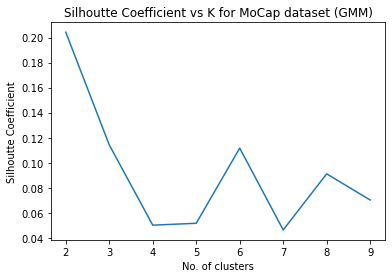

In [125]:
get_gmm_elbow(X_mocap, "Silhoutte Coefficient vs K for MoCap dataset (GMM)")

## Validating Clusters 

In [128]:
#reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

homogeneity_score(KMeans(n_clusters=2, random_state=27).fit_predict(X_mocap), y_mocap)

0.6796622268582501

In [129]:
homogeneity_score(KMeans(n_clusters=2, random_state=27).fit_predict(X_pd), y_pd)

0.0855481340859431

In [130]:
homogeneity_score(GaussianMixture(n_components=2, random_state=27, reg_covar=1e-4).fit_predict(X_mocap), y_mocap)

0.6926346611384895

In [131]:
homogeneity_score(GaussianMixture(n_components=2, random_state=27, reg_covar=1e-4).fit_predict(X_pd), y_pd)

0.09445502292496037

In [136]:
df_mocap["cluster"] = KMeans(n_clusters=2, random_state=27).fit_predict(X_mocap)
df_pd["cluster"] = KMeans(n_clusters=2, random_state=27).fit_predict(X_pd)

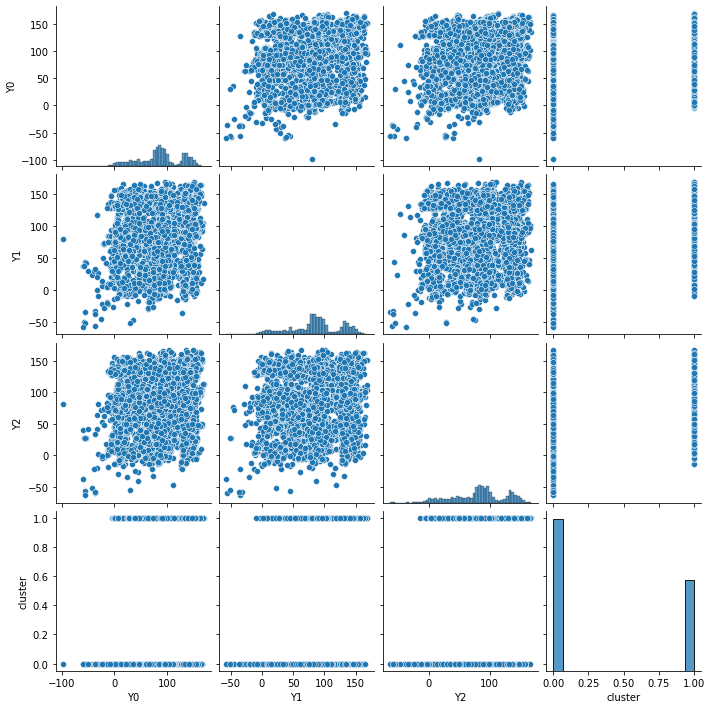

In [140]:
sns.pairplot(df_mocap[["Y0", "Y1", "Y2", "cluster"]])

In [150]:
df_pd.corr()["cluster"].abs().sort_values().index[-10:]

Index(['app_LT_entropy_shannon_4_coef', 'app_LT_TKEO_std_9_coef',
       'app_entropy_log_7_coef', 'app_LT_entropy_shannon_5_coef',
       'app_LT_TKEO_std_10_coef', 'app_LT_TKEO_mean_10_coef',
       'app_LT_TKEO_std_8_coef', 'app_LT_TKEO_mean_9_coef',
       'app_LT_TKEO_mean_8_coef', 'cluster'],
      dtype='object')

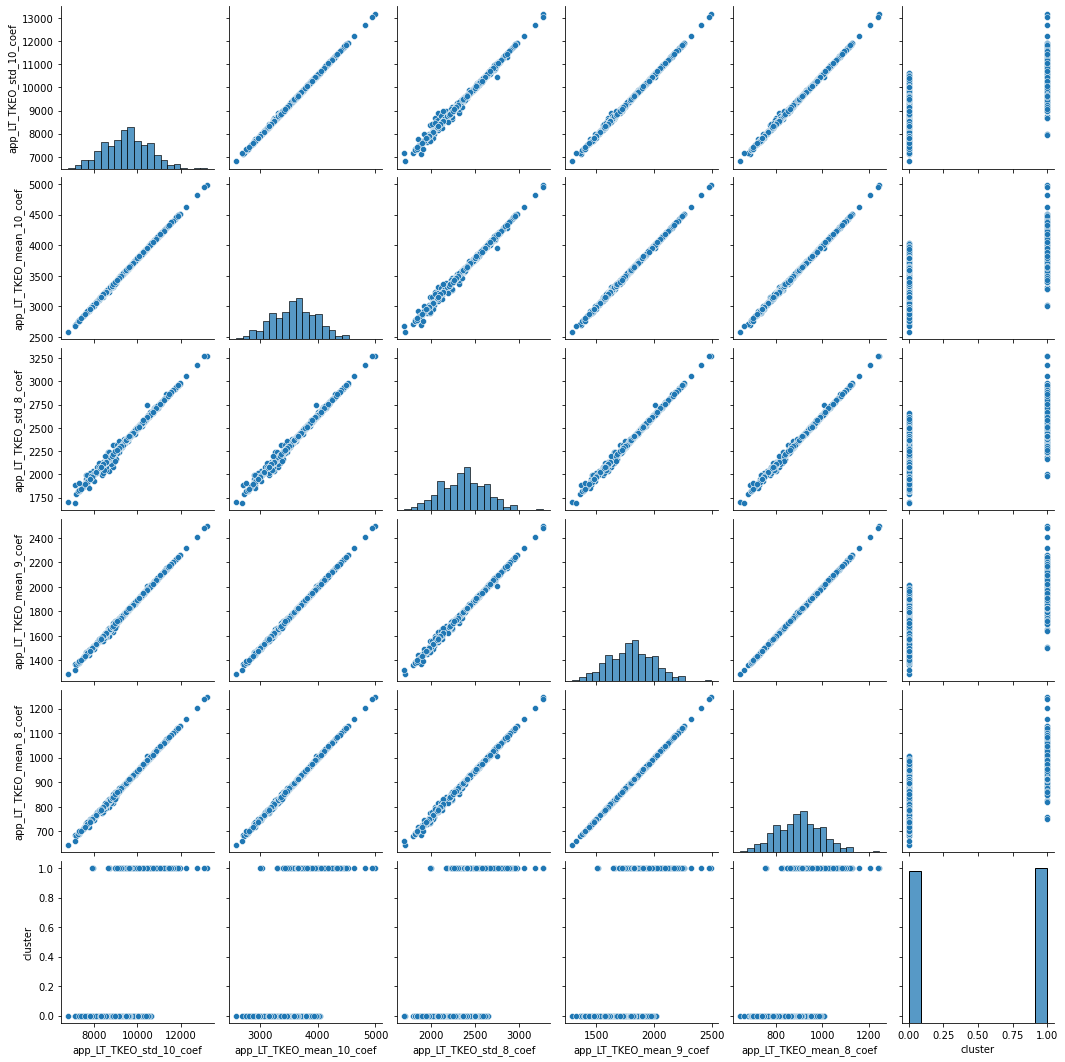

In [152]:
sns.pairplot(df_pd[[
       'app_LT_TKEO_std_10_coef', 'app_LT_TKEO_mean_10_coef',
       'app_LT_TKEO_std_8_coef', 'app_LT_TKEO_mean_9_coef',
       'app_LT_TKEO_mean_8_coef', 'cluster']])